<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica_3_1/blob/main/Practica_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Límite de decisión para el cluster 1:
Centroide: [6.1 2.8 4.  1.3], Límite: 5.845511098270193
----
Límite de decisión para el cluster 2:
Centroide: [6.8 3.2 5.9 2.3], Límite: 3.465544690232692
----
Límite de decisión para el cluster 3:
Centroide: [6.3 2.8 5.1 1.5], Límite: 1.8165902124584952
----
Los índices de las clases predichas.: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 55, 57, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 74, 75, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 106, 100, 102, 104, 105, 107, 108, 109, 112, 115, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 139, 140, 141, 143, 144, 145, 148, 50, 51, 52, 54, 56, 58, 63, 70, 72, 73, 76, 77, 83, 86, 91, 101, 103, 110, 111, 113, 114, 116, 119, 121, 123, 126, 127, 133, 134, 137, 138, 142, 146, 147, 149]
Precisión con el modelo

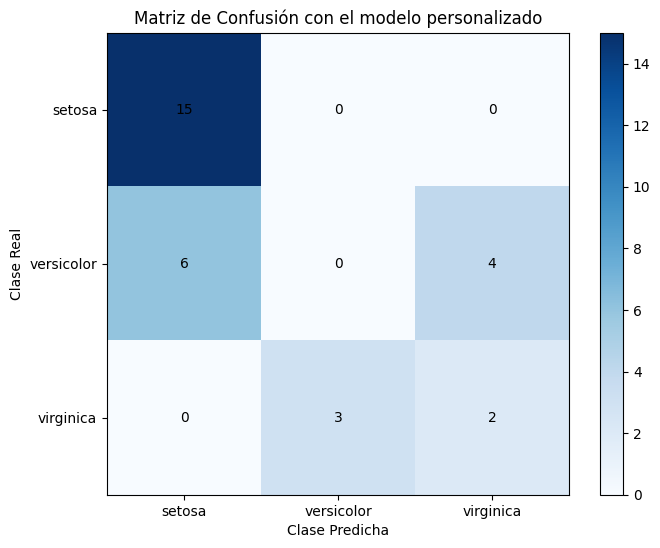

In [47]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

class MiModeloFitPredict:
    def __init__(self, num_clusters):
        self.num_clusters = num_clusters
        self.centroids = None
        self.limite_decision = None

    def fit(self, X, y):
        # Inicializar los centroides seleccionando aleatoriamente puntos de datos
        indices_centroides = np.random.choice(len(X), size=self.num_clusters, replace=False)
        self.centroids = X[indices_centroides]

        # Calcular límites de decisión
        self.calcular_limites_decision(X, y)

    def calcular_limites_decision(self, X, y):
        # Calcular distancias euclidianas y asignar puntos a clusters
        distancias = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        clases_asignadas = np.argmin(distancias, axis=1)

        # Calcular los límites de decisión
        self.limite_decision = {}
        for cluster in range(self.num_clusters):
            puntos_cluster = X[clases_asignadas == cluster]
            distancias_cluster = distancias[clases_asignadas == cluster]
            limite_cluster = np.max(distancias_cluster)
            self.limite_decision[cluster] = (self.centroids[cluster], limite_cluster)

    def predict(self, X_prueba):
        # Predicción basada en la distancia al límite de decisión
        distancias_prueba = np.linalg.norm(X_prueba[:, np.newaxis] - self.centroids, axis=2)
        clases_predichas = np.argmin(distancias_prueba, axis=1)

        return clases_predichas

    def imprimir_limites_decision(self):
        for cluster, (centroide, limite) in self.limite_decision.items():
            print(f"Límite de decisión para el cluster {cluster + 1}:")
            print(f"Centroide: {centroide}, Límite: {limite}")
            print("----")

def cargar_datos_desde_archivo(ruta_archivo):
    # Cargar datos desde un archivo .data
    datos = np.genfromtxt(ruta_archivo, delimiter=',', dtype=float)
    X = datos[:, :-1]
    y = datos[:, -1].astype(int)
    return X, y

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Instanciar y ajustar el modelo personalizado
modelo = MiModeloFitPredict(num_clusters=3)
modelo.fit(X, y)

# Imprimir los límites de decisión
modelo.imprimir_limites_decision()

# Predicción del conjunto de datos de prueba usando el modelo personalizado
etiquetas_predichas = modelo.predict(X)
#print("Etiquetas predichas:\n", etiquetas_predichas)

# Crear una lista para almacenar todos los índices
todos_los_indices = []

# Imprimir los índices de cada valor en etiquetas_predichas
for valor in np.unique(etiquetas_predichas):
    indices = np.where(etiquetas_predichas == valor)[0]
    todos_los_indices.extend(indices)

# Imprimir la lista completa de índices
print(f'Los índices de las clases predichas.: {todos_los_indices}')

# Definir la proporción para holdout (80%-20%)
proporcion_entrenamiento = 0.8
t_ent = int(len(X) * proporcion_entrenamiento)

# Random los índices de los datos
ind_r = np.random.permutation(len(X))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train = X[ind_r[:t_ent]]
#print(X_train)
y_train = y[ind_r[:t_ent]]
#print(y_train)
X_test = X[ind_r[t_ent:]]
#print(X_test)
y_test = y[ind_r[t_ent:]]
#print(y_test)

# Esto se reemplaza con lo que haremos
y_pred_personalizado = modelo.predict(X_test)

# Calcular la precisión del clasificador
accuracy_personalizado = accuracy_score(y_test, y_pred_personalizado)
print("Precisión con el modelo personalizado: {:.2f}%".format(accuracy_personalizado * 100))

# Calcular la matriz de confusión manualmente
num_clases = len(np.unique(y))
conf_matrix_personalizado = np.zeros((num_clases, num_clases), dtype=int)

for true_label, pred_label in zip(y_test, y_pred_personalizado):
    conf_matrix_personalizado[true_label, pred_label] += 1

# Imprimir la matriz de confusión
print("Matriz de Confusión con el modelo personalizado:")
print(conf_matrix_personalizado)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_personalizado, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión con el modelo personalizado')
plt.colorbar()

classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_personalizado[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

# PCA

Características escogidas


* petal_length
* petal_width
* sepal_width




Se ven tres conjuntos en el gráfico debido a la naturaleza del conjunto de datos Iris, que consta de tres clases de flores: setosa, versicolor y virginica. Cada clase tiene una distribución diferente en el espacio de características reducido, y PCA ha capturado estas diferencias.

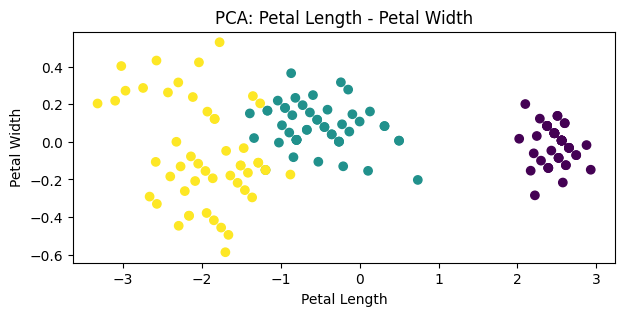

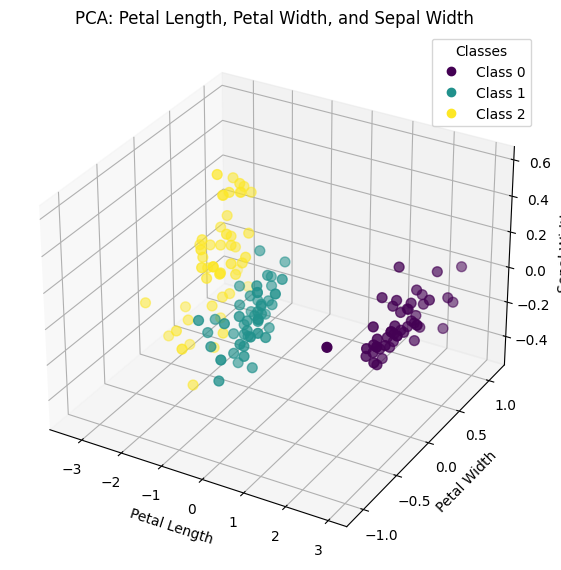

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Seleccionar las características de interés
petal_length = X[:, 2]
petal_width = X[:, 3]
sepal_width = X[:, 1]

# Función para realizar PCA a mano
def manual_pca(X):
    # Centrar los datos
    X_centered = X - np.mean(X, axis=0)

    # Calcular la matriz de covarianza
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Calcular los autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Ordenar los autovectores en orden descendente por los autovalores
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    # Proyectar los datos originales en el nuevo espacio
    X_pca = X_centered.dot(eigenvectors_sorted)

    return X_pca

# Aplicar PCA a mano para el caso uno: Petal Length y Petal Width
X_case_one = np.column_stack((petal_length, petal_width))
X_pca_case_one = manual_pca(X_case_one)

# Visualización en 2D (petal length vs petal width)
plt.figure(figsize=(7, 3))
plt.scatter(X_pca_case_one[:, 0], X_pca_case_one[:, 1], c=y, cmap='viridis')
plt.title('PCA: Petal Length - Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Aplicar PCA a mano para el caso dos: Petal Length, Petal Width y Sepal Width
X_case_two = np.column_stack((petal_length, petal_width, sepal_width))
X_pca_case_two = manual_pca(X_case_two)

# Visualización en 3D (petal length, petal width y sepal width)
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(X_pca_case_two[:, 0], X_pca_case_two[:, 1], X_pca_case_two[:, 2], c=y, cmap='viridis', s=50)
ax.set_title('PCA: Petal Length, Petal Width, and Sepal Width')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Width')

# Agregar leyenda
legend_labels = [f'Class {i}' for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], title='Classes', labels=legend_labels)

plt.show()


# t-SNE

Características escogidas


* petal_length
* petal_width
* sepal_width

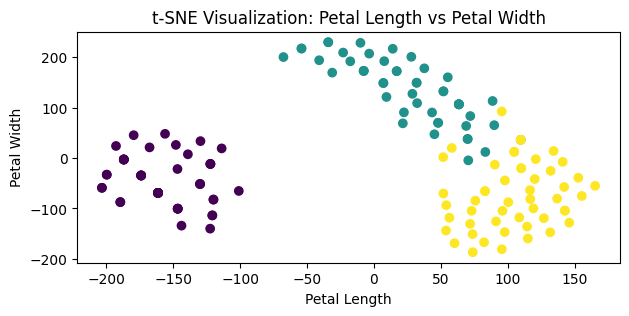

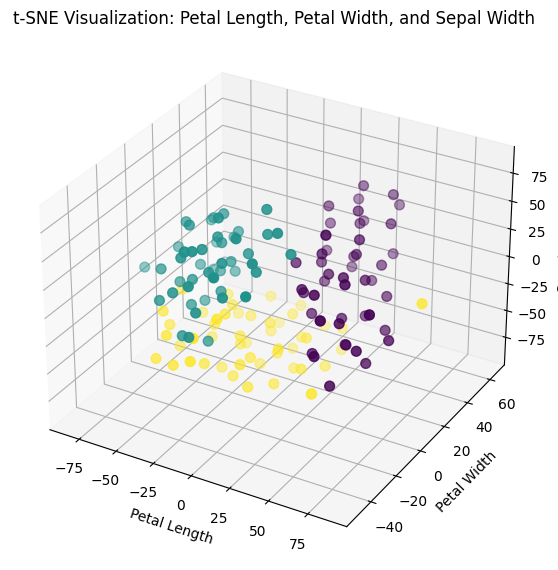

In [49]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Cargar el conjunto de datos Iris
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Seleccionar las características de interés
petal_length = X[:, 2]
petal_width = X[:, 3]
sepal_width = X[:, 1]

# Caso 1: Utilizando petal length y petal width
X_case1 = np.column_stack((petal_length, petal_width))

# Caso 2: Utilizando petal length, petal width y sepal width
X_case2 = np.column_stack((petal_length, petal_width, sepal_width))

# Función para visualizar datos con t-SNE
def visualize_t_sne(X, title):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Crear un scatter plot
    plt.figure(figsize=(7, 3))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()

# Visualizar casos
visualize_t_sne(X_case1, 't-SNE Visualization: Petal Length vs Petal Width')

# Función para visualizar datos con t-SNE en 3D
def visualize_t_sne_3d(X, title):
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Crear un scatter plot en 3D
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(121, projection='3d')
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    ax.set_zlabel('Sepal Width')
    plt.show()

# Visualizar caso 2 en 3D
visualize_t_sne_3d(X_case2, 't-SNE Visualization: Petal Length, Petal Width, and Sepal Width')


###Crear subconjuntos de datos para probar el método de clasificación

####PCA

Las dos características más relevantes según PCA, con dos clases (en la
visualización se identifico las de mayor discriminación).

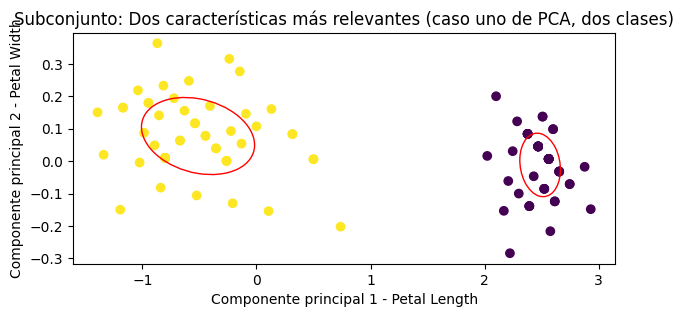

In [65]:
from matplotlib.patches import Ellipse

def visualize_pca_2_features_two_classes(X, y, title, feature_names):
    selected_classes = (y == 0) | (y == 1)
    X_subcase_two_classes = X[selected_classes]
    y_two_classes = y[selected_classes]

    plt.figure(figsize=(7, 3))

    scatter = plt.scatter(X_subcase_two_classes[:, 0], X_subcase_two_classes[:, 1], c=y_two_classes, cmap='viridis')

    # Añadir contornos elípticos para resaltar regiones discriminativas
    for class_label in np.unique(y_two_classes):
        class_data = X_subcase_two_classes[y_two_classes == class_label]
        cov_matrix = np.cov(class_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

        # Tomar la raíz cuadrada positiva de los autovalores
        width, height = 2 * np.sqrt(eigenvalues)

        # Crear y agregar la elipse
        ellipse = Ellipse(xy=np.mean(class_data, axis=0), width=width, height=height, angle=angle, edgecolor='red', fc='None', lw=1)
        plt.gca().add_patch(ellipse)

    plt.title(title)
    plt.xlabel(f'Componente principal 1 - {feature_names[0]}')
    plt.ylabel(f'Componente principal 2 - {feature_names[1]}')
    plt.show()

feature_names = ['Petal Length', 'Petal Width', 'Sepal Width']
visualize_pca_2_features_two_classes(X_pca_case_one[:, :2], y, 'Subconjunto: Dos características más relevantes (caso uno de PCA, dos clases)', feature_names[:2])

Las dos características más relevantes según PCA, con tres clases (en la
visualización identifiquen las de mayor discriminación).

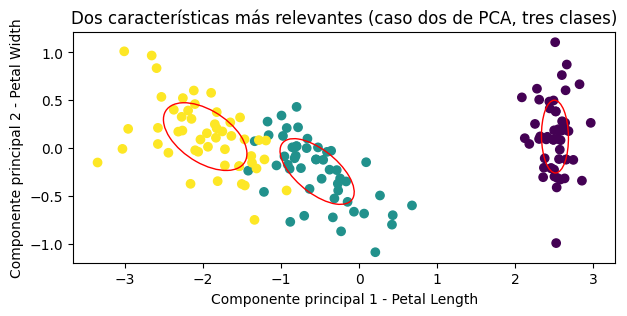

In [66]:
def visualize_pca_2_features_three_classes(X, y, title, feature_names):
    selected_classes = (y == 0) | (y == 1) | (y == 2)
    X_subcase_three_classes = X[selected_classes]
    y_three_classes = y[selected_classes]

    plt.figure(figsize=(7, 3))

    # Scatter plot
    scatter = plt.scatter(X_subcase_three_classes[:, 0], X_subcase_three_classes[:, 1], c=y_three_classes, cmap='viridis')

    # Añadir contornos elípticos para resaltar regiones discriminativas
    for class_label in np.unique(y_three_classes):
        class_data = X_subcase_three_classes[y_three_classes == class_label]
        cov_matrix = np.cov(class_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

        # Tomar la raíz cuadrada positiva de los autovalores
        width, height = 2 * np.sqrt(eigenvalues)

        # Crear y agregar la elipse
        ellipse = Ellipse(xy=np.mean(class_data, axis=0), width=width, height=height, angle=angle, edgecolor='red', fc='None', lw=1)
        plt.gca().add_patch(ellipse)

    plt.title(title)
    plt.xlabel(f'Componente principal 1 - {feature_names[0]}')
    plt.ylabel(f'Componente principal 2 - {feature_names[1]}')
    plt.show()

feature_names = ['Petal Length', 'Petal Width', 'Sepal Width']
visualize_pca_2_features_three_classes(X_pca_case_two[:, :2], y, 'Dos características más relevantes (caso dos de PCA, tres clases)', feature_names[:2])

Las tres características más relevantes según PCA, con dos clases.

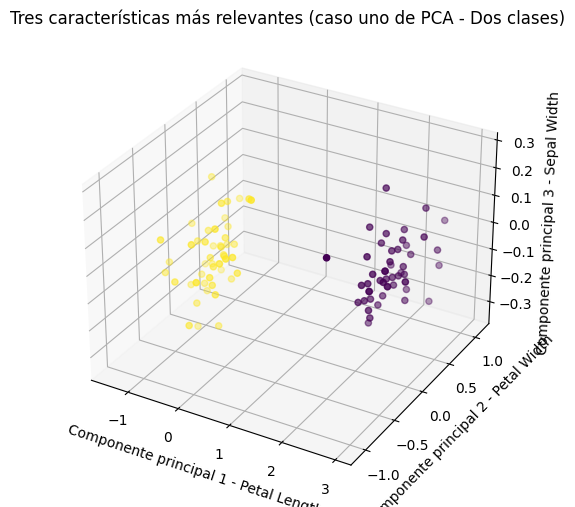

In [52]:
def visualize_pca_3_features_two_classes(X, y, title, feature_names):
    selected_classes = (y == 0) | (y == 1)
    X_subcase_two_classes = X[selected_classes]
    y_two_classes = y[selected_classes]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_subcase_two_classes[:, 0], X_subcase_two_classes[:, 1], X_subcase_two_classes[:, 2], c=y_two_classes, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(f'Componente principal 1 - {feature_names[0]}')
    ax.set_ylabel(f'Componente principal 2 - {feature_names[1]}')
    ax.set_zlabel(f'Componente principal 3 - {feature_names[2]}')
    plt.show()

feature_names = ['Petal Length', 'Petal Width', 'Sepal Width']
visualize_pca_3_features_two_classes(X_pca_case_three, y, 'Tres características más relevantes (caso uno de PCA - Dos clases)', feature_names)

####t_SNE

Las dos características más relevantes según t-SNE, con dos clases y las dos características más relevantes según t-SNE, con tres clases.

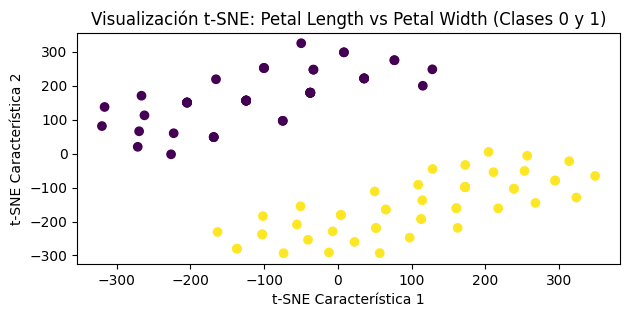

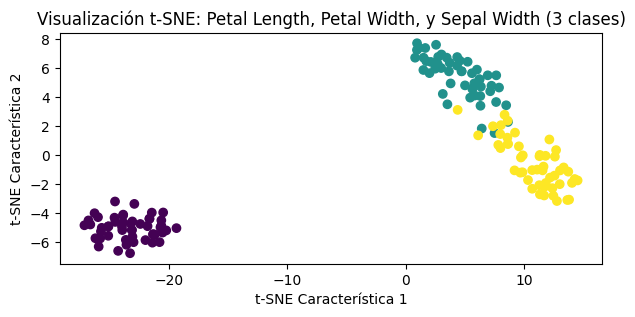

In [53]:
def visualize_t_sne_2_features(X, y, classes, title):
    # Filtrar las clases de interés
    mask = np.isin(y, classes)
    X_selected = X[mask]
    y_selected = y[mask]

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_selected)

    # Crear un scatter plot
    plt.figure(figsize=(7, 3))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_selected, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('t-SNE Característica 1')
    plt.ylabel('t-SNE Característica 2')
    plt.show()

# Visualizar dos clases (0 y 1)
classes_to_visualize_2 = [0, 1]
visualize_t_sne_2_features(X_case1, y, classes_to_visualize_2, 'Visualización t-SNE: Petal Length vs Petal Width (Clases 0 y 1)')

# Visualizar tres clases (0, 1, 2)
all_classes = [0, 1, 2]
visualize_t_sne_2_features(X_case2, y, all_classes, 'Visualización t-SNE: Petal Length, Petal Width, y Sepal Width (3 clases)')